### **misc**

In [ ]:
import cv2
import tensorflow as tf

z=0

IMG_SIZE=200
CATEGORIES = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

z=0
img_array=cv2.imread('/content/data/Train/B/B-1000.jpg',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
k=new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
model=tf.keras.models.load_model("/content/naya.model")
prediction=model.predict([k])
for i in range(0,26):
    if (prediction[0][i]==1):
        z=i

print(CATEGORIES[z])

In [ ]:
from google.colab import files
files.download('naya.model')

In [ ]:
!pip install keras-tuner

### ***Keras tuner***

In [ ]:
X=X/255.0

In [ ]:
X[0].shape

(200, 200, 1)

In [ ]:
X=X.reshape(-1,200,200,1)

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(200,200,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
     keras.layers.Dropout(0.5),
    keras.layers.Dense(25, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_acc',
                          max_trials=5,directory='output',project_name="f")

In [ ]:
tuner_search.search(X,y,epochs=3,validation_split=0.1)

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()
model.fit(X, y, epochs=10, validation_split=0.1, initial_epoch=3)
fname = "weights-Test-CNN.hdf5"
model.save_weights(fname,overwrite=True)



# Loading weights

fname = "weights-Test-CNN.hdf5"
model.load_weights(fname)
model.save('ekaur.model')



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Main stuff starts here

### ***Utilities***

In [ ]:
!unzip -q "directory location of dataset"

In [ ]:
#if the dataset is stored in drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
'''at the time I was struggling with the training of custom dataset so i employed conversion
of the image into numpy arrays but a better way to deal with this is to use keras ImageDataGenerator and 
flow from directory for scaling and importing a custon dataset seen in Yellow models'''


import numpy as np
import os
#from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "/content/data2/train"

# All the categories you want your neural network to detect
CATEGORIES = ['aboard','all_gone','baby','beside','book','bowl','bridge','camp','cartridge',
              'eight','five','fond','four','friend','glove','hang','high','house','how_many',
              'loeMe','man','marry','meat','medal','opposite']
# The size of the images that your neural network will use
IMG_SIZE = 200

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


np.save('X.npy', X)
np.save('y.npy',y)

### **Gray1**

In [ ]:
#increasing RAM size ;-)
a = []
while(1):
    a.append('1')

In [ ]:
##Use dataset importing technique used in colour1 and color 2 and avoid np.load since it is heavy on the ram

import tensorflow as tf
import numpy as np
import pickle
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#X = pickle.load(open("X.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))
X = np.load('/content/drive/My Drive/X.npy')
X = X/255.0
y=np.load('/content/drive/My Drive/y.npy')
model = Sequential() 

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])





model.summary()

history = model.fit(X, y, batch_size=64, epochs=10,verbose=1, validation_split=0.20)

model.save('gray1.model')


from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True)










Visualising layer outputs

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
model = load_model('/content/drive/My Drive/gray1.model')
model.summary()
from tensorflow.keras.preprocessing import image
import numpy as np
IMG_SIZE=200
img_array=cv2.imread("/content/data2/test/five/five.1000.jpg")
img_hsv = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV)

lower_red = np.array([20, 100, 100])
upper_red = np.array([30, 255, 255])

mask = cv2.inRange(img_hsv, lower_red, upper_red)

res = cv2.bitwise_and(img_array, img_array, mask=mask)
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
new_array=cv2.resize(gray,(200,200))
k=new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs )
activations = activation_model.predict(k)
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
      :, :,
      col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
      row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.savefig(layer_name + '.png')


time: 4min38sec

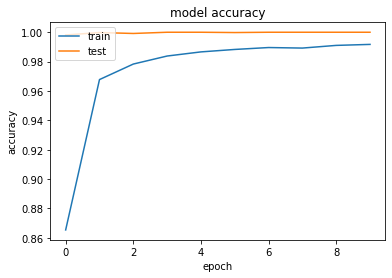

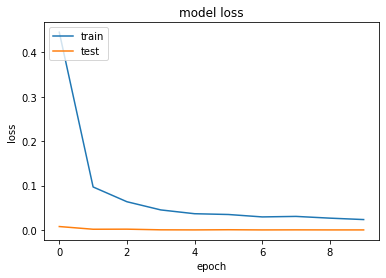

In [ ]:
#signs of overfitting can be seen


import os
import numpy as np
import matplotlib.pyplot as plt

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy
X_test= np.load('/content/drive/My Drive/X_test.npy')
X_test = X_test/255.0
y_test=np.load('/content/drive/My Drive/y_test.npy')
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 97.22%


### **Gray2**

In [ ]:
##Use dataset importing technique used in colour1 and color 2 and avoid np.load since it is heavy on the ram


import tensorflow as tf
import numpy as np
import pickle
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#X = pickle.load(open("X.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))
X = np.load('/content/drive/My Drive/X.npy')
X = X/255.0
y=np.load('/content/drive/My Drive/y.npy')
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(200,200,1), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

model.add(Dropout(0.5))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 9216, activation = "relu"))



# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))


# 3rd Fully Connected Layer
model.add(Dense(4096, activation = "relu"))



# Output Layer
model.add(Dense(25, activation = "softmax")) #As we have two classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.summary()

history = model.fit(X, y, batch_size=64, epochs=10,verbose=1, validation_split=0.20)


model.save('gray1.model')


4min50sec

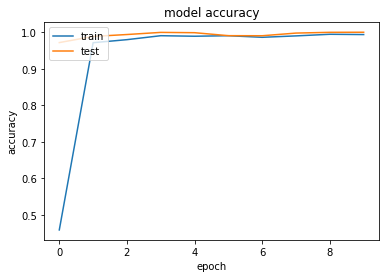

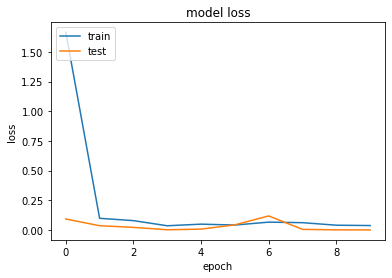

In [ ]:
#signs of overfitting

import os
import numpy as np
import matplotlib.pyplot as plt

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy
X_test= np.load('/content/drive/My Drive/X_test.npy')
X_test = X_test/255.0
y_test=np.load('/content/drive/My Drive/y_test.npy')
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.22%


### ***Colour 1***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

data_root='/content/data2/train'
IMAGE_SHAPE = (200, 200)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE,
class_mode='binary'
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE,
class_mode='binary')



model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))




model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val = np.ceil(valid_generator.samples/valid_generator.batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,

    validation_data=valid_generator,
    validation_steps=val
).history

model.save('yellow1.model')


time:7min49secs for 5 epochs

time:15min19secs for 10 epochs


In [ ]:
data_root='/content/data2/test'
IMAGE_SHAPE = (200, 200)
TRAINING_DATA_DIR = str(data_root)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_data_gen = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
shuffle=True,
target_size=IMAGE_SHAPE,
class_mode='binary')
scores = model.evaluate_generator(val_data_gen,100) #1514 testing images
print("Accuracy = ", scores[1])

acc: 96.65

In [ ]:
import cv2
import tensorflow as tf
import numpy as np


CATEGORIES = ['aboard','all_gone','baby','beside','book','bowl','bridge','camp','cartridge',
              'eight','five','fond','four','friend','glove','hang','high','house','how_many',
              'loeMe','man','marry','meat','medal','opposite']

z=0
key = ord('e')
IMG_SIZE=200
img_array=cv2.imread('/content/data2/test/hang/hang.1101.jpg')
img_hsv = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV)

lower_red = np.array([20, 100, 100])
upper_red = np.array([30, 255, 255])

mask = cv2.inRange(img_hsv, lower_red, upper_red)

res = cv2.bitwise_and(img_array, img_array, mask=mask)
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
new_array=cv2.resize(res,(200,200))
k=new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
#model=tf.keras.models.load_model("F:\\datasets\\naya (2) (2).model")
model=tf.keras.models.load_model("/content/yellow1.model")
prediction=model.predict([k])
for i in range(0,25):
    if (prediction[0][i]==1):
        z=i


print(CATEGORIES[z])

hang


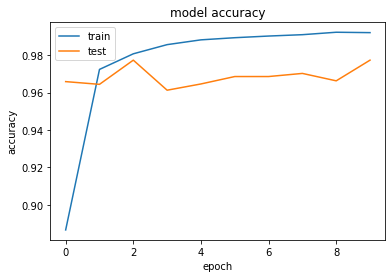

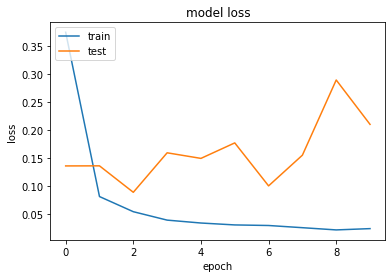

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Colour2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

data_root='/content/data2/train'
IMAGE_SHAPE = (227, 227)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE,
class_mode='binary'
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE,
class_mode='binary')



model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 9216, activation = "relu"))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))

# 3rd Fully Connected Layer
model.add(Dense(4096, activation = "relu"))

# Output Layer
model.add(Dense(25, activation = "softmax")) #As we have two classes

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])





model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val = np.ceil(valid_generator.samples/valid_generator.batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,

    validation_data=valid_generator,
    validation_steps=val
).history



model.save('yellow2.model')


/content/data2/train
Found 4800 images belonging to 25 classes.
Found 19200 images belonging to 25 classes.
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 13, 13, 384)       1327488   
___________

time:7min52secs for 5 epochs

time: 15min28sec for 10 epochs

In [ ]:
data_root='/content/data2/test'
IMAGE_SHAPE = (227, 227)
TRAINING_DATA_DIR = str(data_root)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_data_gen = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
shuffle=True,
target_size=IMAGE_SHAPE,
class_mode='binary')
scores = model.evaluate_generator(val_data_gen,500) #1514 testing images
print("Accuracy = ", scores[1])

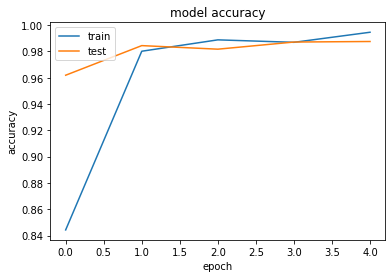

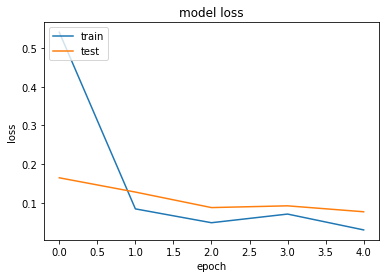

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()